In [22]:
from scipy.signal import bode, TransferFunction
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [23]:
df = pd.read_csv('sim_out_200.csv')
df

,time,pos_7.943282347242816,pos_8.092464596220182,pos_8.244448626934243,pos_8.399287059458466,pos_8.55703350212035,pos_8.717742570061775,pos_8.88146990414791,pos_9.048272190231256,pos_9.218207178777467,...,pos_42.3909087957854,pos_43.18704958921251,pos_43.998142649079895,pos_44.824468792893086,pos_45.666314112172294,pos_46.523970071503186,pos_47.39773360944813,pos_48.28790724135257,pos_49.194799164082205,pos_50.11872336272722
0,0.00,0.149864,0.149864,0.149864,0.149864,0.149864,0.149864,0.149864,0.149864,0.149864,...,0.149864,0.149864,0.149864,0.149864,0.149864,0.149864,0.149864,0.149864,0.149864,0.149864
1,0.01,0.148301,0.148301,0.148300,0.148300,0.148299,0.148298,0.148298,0.148297,0.148297,...,0.148181,0.148178,0.148176,0.148173,0.148170,0.148167,0.148165,0.148162,0.148159,0.148156
2,0.02,0.146162,0.146160,0.146158,0.146156,0.146153,0.146151,0.146149,0.146146,0.146144,...,0.145698,0.145689,0.145679,0.145670,0.145661,0.145651,0.145641,0.145632,0.145622,0.145612
3,0.03,0.143702,0.143696,0.143691,0.143685,0.143680,0.143674,0.143668,0.143662,0.143656,...,0.142659,0.142641,0.142623,0.142606,0.142588,0.142571,0.142554,0.142537,0.142520,0.142503
4,0.04,0.141167,0.141157,0.141147,0.141137,0.141126,0.141115,0.141104,0.141093,0.141082,...,0.139401,0.139378,0.139357,0.139336,0.139315,0.139296,0.139277,0.139259,0.139243,0.139227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2.96,0.145899,0.145670,0.144469,0.142481,0.140081,0.137770,0.136082,0.135451,0.136096,...,0.144708,0.140506,0.137657,0.145101,0.137167,0.142298,0.141339,0.138510,0.143779,0.137587
297,2.97,0.145930,0.145520,0.144155,0.142061,0.139638,0.137404,0.135881,0.135474,0.136351,...,0.145764,0.138459,0.139444,0.144419,0.136591,0.143749,0.139600,0.140027,0.142787,0.137965
298,2.98,0.145928,0.145338,0.143819,0.141631,0.139204,0.137062,0.135718,0.135540,0.136644,...,0.145930,0.136830,0.141477,0.143010,0.136864,0.144559,0.138111,0.141705,0.141308,0.139025
299,2.99,0.145893,0.145125,0.143462,0.141196,0.138781,0.136749,0.135594,0.135649,0.136971,...,0.145176,0.135918,0.143369,0.141151,0.137930,0.144556,0.137201,0.143162,0.139693,0.140505


<AxesSubplot:xlabel='time'>

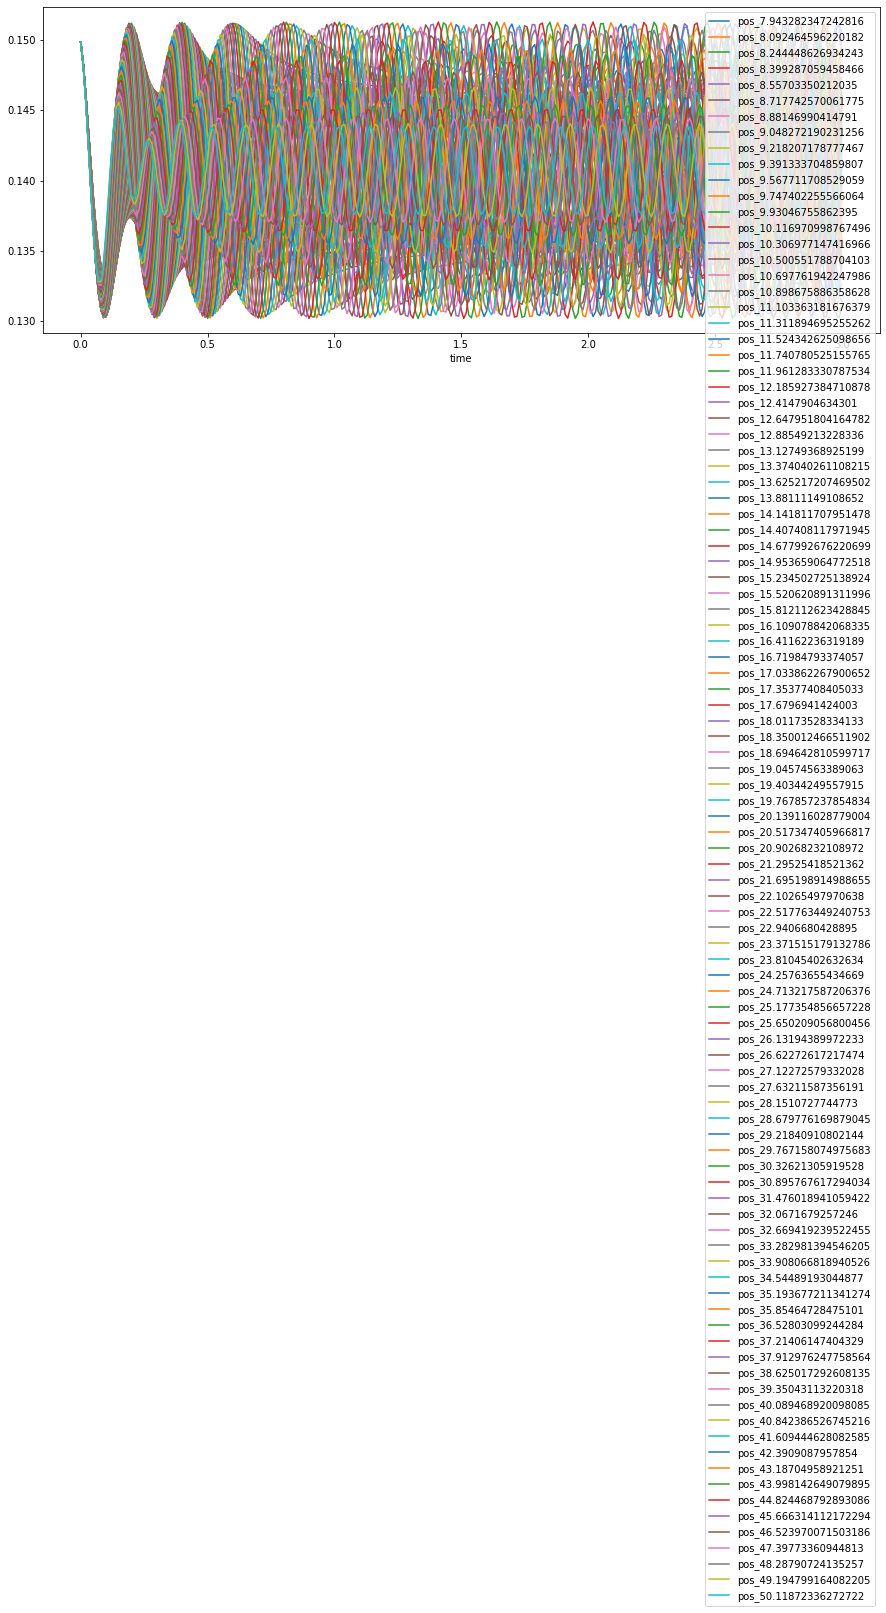

In [24]:
df.plot(x='time', figsize=(15, 6))

In [25]:
N = df.shape[0]

In [26]:
DC = 0.0049
omegas = [float(col.lstrip('pos_')) for col in df.columns[1:]]
maxes = np.array([np.max(df[col].to_numpy(dtype=np.float64)[3*N//4:]) for col in df.columns[1:]])
mins = np.array([np.min(df[col].to_numpy(dtype=np.float64)[3*N//4:]) for col in df.columns[1:]])
amps = (maxes - mins)/2

Text(0.5, 0, 'w (rad/s)')

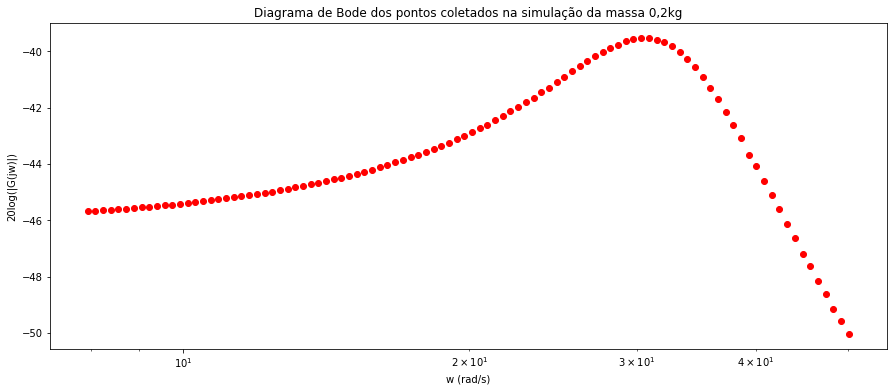

In [27]:
plt.figure(figsize=(15, 6))
plt.xscale('log')
amps_bode = 20*np.log10(abs(amps))
plt.plot(omegas, amps_bode, 'ro')
plt.title("Diagrama de Bode dos pontos coletados na simulação da massa 0,2kg")
plt.ylabel("20log(|G(jw)|)")
plt.xlabel("w (rad/s)")

In [28]:
M_p = np.max(amps)
w_r = omegas[np.where(amps == M_p)[0][0]]
w_r, M_p

(30.32621305919528, 0.010567694902420044)

In [29]:
M_p = M_p/DC
epsilon = np.sqrt(np.polynomial.Polynomial([-1/M_p**2, 4, -4]).roots())[0]
w_n = w_r/np.sqrt(1-2*epsilon**2)
w_n, epsilon

(32.21812779239979, 0.23874236513432406)

In [30]:
df_a = pd.read_csv('sim_out_300.csv')
N = df.shape[0]
DC = 0.0049
omegas = [float(col.lstrip('pos_')) for col in df_a.columns[1:]]
maxes = np.array([np.max(df_a[col].to_numpy(dtype=np.float64)[3*N//4:]) for col in df_a.columns[1:]])
mins = np.array([np.min(df_a[col].to_numpy(dtype=np.float64)[3*N//4:]) for col in df_a.columns[1:]])
amps = (maxes - mins)/2
M_p_a = np.max(amps)
w_r_a = omegas[np.where(amps == M_p_a)[0][0]]
M_p_a = M_p_a/DC
epsilon_a = np.sqrt(np.polynomial.Polynomial([-1/M_p_a**2, 4, -4]).roots())[0]
w_n_a = w_r_a/np.sqrt(1-2*epsilon_a**2)
w_n_a, epsilon_a

(26.67410456645884, 0.1940326173721675)

In [31]:
m_a = .1
m = (m_a*w_n_a**2)/(w_n**2 - w_n_a**2)
k = m*w_n**2
b = 2*epsilon*np.sqrt(m*k)
m, k, b

(0.21791977444742194, 226.20241659553227, 3.3524046018500515)

In [32]:
w, mag, phase = bode(TransferFunction([DC*k], [m, b, k]))

Text(0.5, 0, 'w (rad/s)')

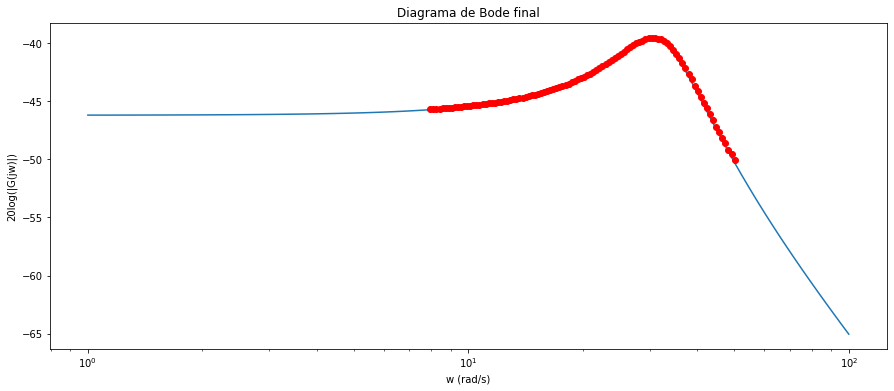

In [34]:
plt.figure(figsize=(15, 6))
plt.xscale('log')
plt.plot(w, mag)
plt.plot(omegas, amps_bode, 'ro')
plt.title("Diagrama de Bode final")
plt.ylabel("20log(|G(jw)|)")
plt.xlabel("w (rad/s)")